A tarefa consiste em fornecer suporte ao time de machine learning e aos desenvolvedores do site da empresa.

A base de dados contém informações sobre os preços de aluguéis de vários imóveis no Rio de Janeiro.

# Conhecendo a base de dados

## Importando os dados


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('aluguel.csv', sep=';')
df.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [3]:
df.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


In [4]:
type(df)

pandas.core.frame.DataFrame

## Características gerais da base de dados

In [5]:
df.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [6]:
df.shape

(32960, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [8]:
df['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [9]:
df[['Quartos', 'Valor']]

,Quartos,Valor
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


# Análise exploratória de dados

## Qual o valor médio de aluguel por tipo de imóvel?

In [10]:
# valor medio de aluguel por tipo de imovel

df.groupby('Tipo')['Valor'].mean().round(2)

Tipo
Apartamento                      4744.61
Box/Garagem                      1899.76
Casa                             6793.45
Casa Comercial                  14478.26
Casa de Condomínio              11952.06
Casa de Vila                     1574.37
Chácara                          4900.00
Conjunto Comercial/Sala         14715.05
Flat                             4546.19
Galpão/Depósito/Armazém         53407.06
Hotel                           25000.00
Indústria                      120000.00
Loft                             2557.88
Loja Shopping/ Ct Comercial      8126.18
Loja/Salão                      13769.65
Loteamento/Condomínio           22000.00
Pousada/Chalé                    1480.00
Prédio Inteiro                 498637.24
Quitinete                        1246.84
Studio                           2400.00
Sítio                           12499.00
Terreno Padrão                  32567.71
Name: Valor, dtype: float64

In [11]:
# outra forma valor medio de aluguel por tipo de imovel

df.groupby('Tipo').mean(numeric_only=True).round(2)

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Tipo,,,,,,,
Apartamento,2.48,1.23,0.88,119.79,4744.61,1722.65,686.17
Box/Garagem,0.06,1.30,0.00,17.52,1899.76,305.45,125.85
Casa,3.13,1.80,1.26,250.58,6793.45,931.28,1582.51
Casa Comercial,1.56,2.20,0.26,372.24,14478.26,1935.71,1707.39
Casa de Condomínio,4.01,3.10,2.86,456.16,11952.06,1342.03,3252.52
Casa de Vila,1.93,0.39,0.23,78.47,1574.37,138.77,183.88
Chácara,3.00,0.00,0.00,0.00,4900.00,NaN,NaN
Conjunto Comercial/Sala,0.04,2.52,0.01,214.47,14715.05,4512.22,1399.60
Flat,1.42,0.96,0.75,65.48,4546.19,2027.72,493.17


In [12]:
# valor medio de aluguel por tipo de imovel, mais organizado
df.groupby('Tipo')[['Valor']].mean().round(2).sort_values('Valor')


,Valor
Tipo,
Quitinete,1246.84
Pousada/Chalé,1480.00
Casa de Vila,1574.37
Box/Garagem,1899.76
Studio,2400.00
Loft,2557.88
Flat,4546.19
Apartamento,4744.61
Chácara,4900.00


<Axes: ylabel='Tipo'>

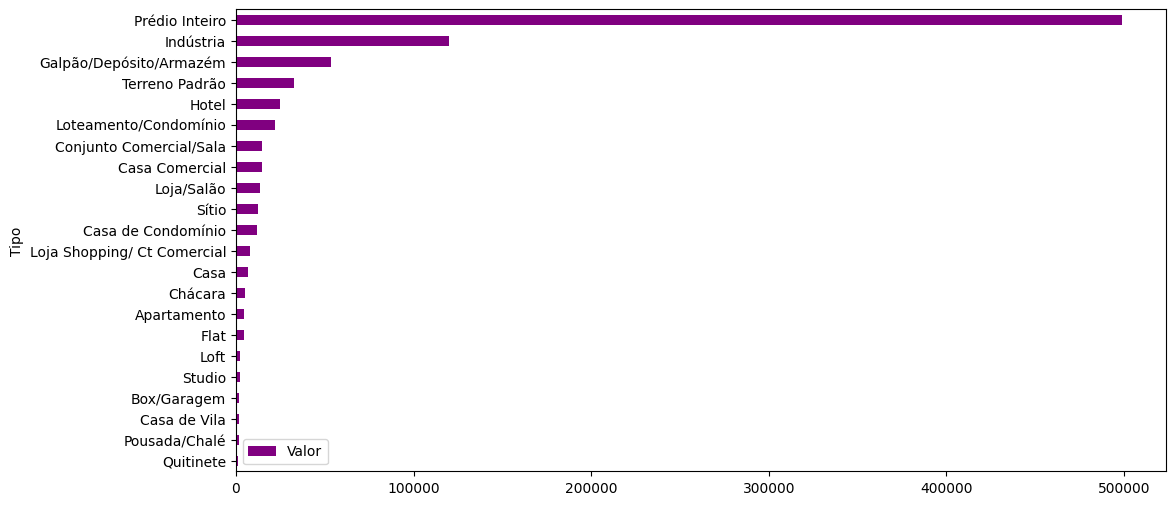

In [13]:
df_preco_tipo = df.groupby('Tipo')[['Valor']].mean().round(2).sort_values('Valor')

df_preco_tipo.plot(kind='barh', figsize=(12,6), color = 'purple')

## Removendo os imóveis comerciais

In [14]:
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [15]:
# imoveis comerciais que precisao ser removidos

imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

In [16]:
# query do pandas em Python para filtrar um DataFrame (df). Ela está buscando por linhas onde a coluna 'Tipo' contenha valores que estão na variável imoveis_comerciais.

# O @ antes de imoveis_comerciais indica que é uma variável externa do contexto da consulta, ou seja, o valor contido na variável imoveis_comerciais será utilizado na operação de filtro como uma lista de valores para verificar se os elementos da coluna 'Tipo' do DataFrame estão presentes nessa lista usando o 'in'.

df.query('Tipo in @imoveis_comerciais')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


In [17]:
# query usando 'not in' para selecionar somente os imoveis residenciais.

df.query('Tipo not in @imoveis_comerciais')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [18]:
df_residencial = df.query('Tipo not in @imoveis_comerciais')
df_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


In [19]:
df_residencial.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

<Axes: ylabel='Tipo'>

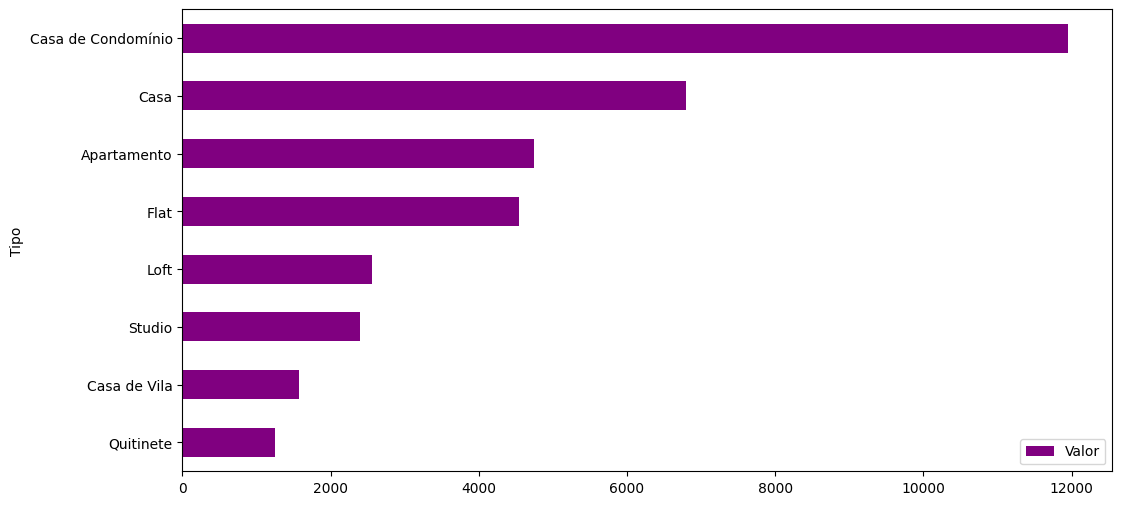

In [20]:
df_preco_tipo = df_residencial.groupby('Tipo')[['Valor']].mean().round(2).sort_values('Valor')

df_preco_tipo.plot(kind='barh', figsize=(12,6), color = 'purple')

## Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [21]:
df_residencial.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

In [22]:
df_residencial.Tipo.value_counts()

Apartamento           19532
Casa de Condomínio      996
Casa                    967
Quitinete               836
Flat                    476
Casa de Vila            249
Loft                     51
Studio                    4
Name: Tipo, dtype: int64

In [23]:
# normalize = True faz com que os valores sejam apresentados em porcentagem

df_residencial.Tipo.value_counts(normalize=True).to_frame().round(4) * 100

,Tipo
Apartamento,84.51
Casa de Condomínio,4.31
Casa,4.18
Quitinete,3.62
Flat,2.06
Casa de Vila,1.08
Loft,0.22
Studio,0.02


In [24]:
df_residencial_percentual = df_residencial.Tipo.value_counts(normalize=True).to_frame().round(4) * 100

df_residencial_percentual.rename(columns={'Tipo': 'Percentual'}, inplace=True)
df_residencial_percentual


,Percentual
Apartamento,84.51
Casa de Condomínio,4.31
Casa,4.18
Quitinete,3.62
Flat,2.06
Casa de Vila,1.08
Loft,0.22
Studio,0.02


<Axes: title={'center': 'Percentual de imóveis residenciais por tipo'}, xlabel='Tipo', ylabel='Percentual'>

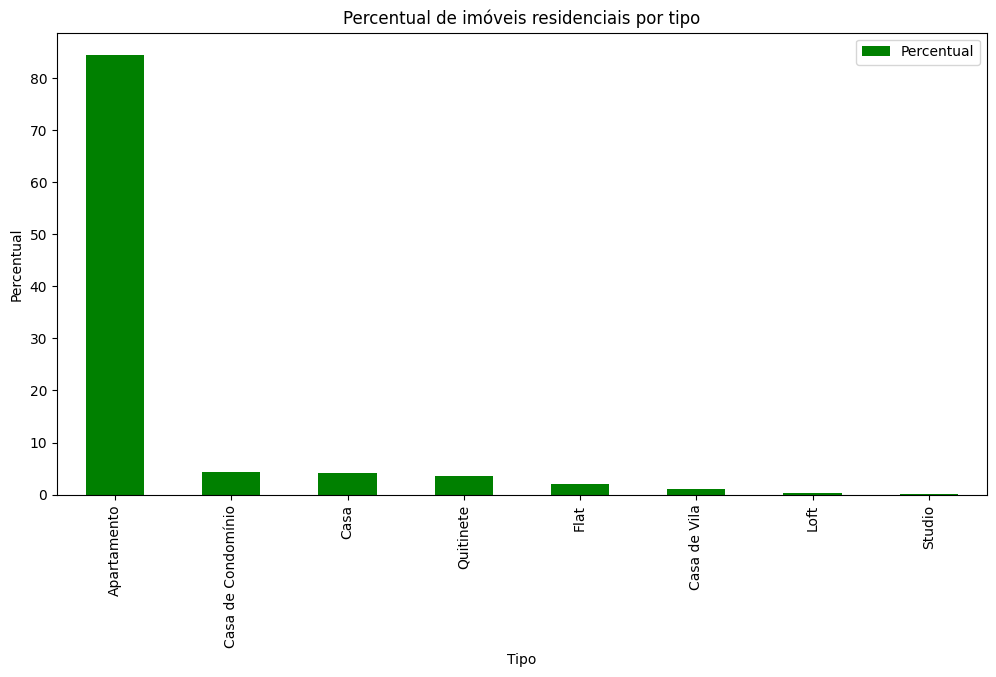

In [25]:
# criando uma visualização dos dados em forma de gráfico

df_residencial_percentual.plot(kind='bar', figsize=(12,6), color = 'green', xlabel='Tipo', ylabel='Percentual', title='Percentual de imóveis residenciais por tipo')

### **Selecionando apenas os imóveis do tipo apartamento**

In [26]:
df_residencial.query('Tipo == "Apartamento"').reset_index(drop=True)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
2,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
3,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
4,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
19527,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
19528,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
19529,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
19530,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [27]:
df_residencial_apt = df_residencial.query('Tipo == "Apartamento"').reset_index(drop=True)
df_residencial_apt

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
2,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
3,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
4,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
19527,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
19528,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
19529,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
19530,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


# Tratando e filtrando os dados

## Lidando com dados nulos
    Para esse projeto os valores null serão substituídos por 0

In [28]:
df_residencial_apt.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
19527,False,False,False,False,False,False,False,False,True
19528,False,False,False,False,False,False,False,False,False
19529,False,False,False,False,False,False,False,False,False
19530,False,False,False,False,False,False,False,False,False


In [29]:
df_residencial_apt.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            7
Condominio     745
IPTU          5472
dtype: int64

In [30]:
# preencher os valores nulos com 0

df_residencial_apt.fillna(0, inplace=True)

In [31]:
df_residencial_apt.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

## Removendo registros

In [32]:
# remover apartamentos com valor e condominios igual a 0

df_residencial_apt = df_residencial_apt.query('Valor > 0 and Condominio > 0').reset_index(drop=True)
df_residencial_apt

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
18775,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
18777,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [33]:
df_residencial_apt.query('Valor == 0 or Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [34]:
df_residencial_apt.Tipo.unique()

array(['Apartamento'], dtype=object)

In [35]:
# remover coluna Tipo, pois só temos apartamentos

df_residencial_apt.drop(columns=['Tipo'], inplace=True)

In [36]:
df_residencial_apt

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


## Filtros

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



In [37]:
df_residencial_apt.query('Quartos == 1 and Valor < 1200').reset_index(drop=True)

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Tijuca,1,0,0,48,750.0,772.0,25.0
3,Centro,1,0,0,27,750.0,371.0,19.0
4,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
494,Grajaú,1,0,1,37,1000.0,200.0,0.0
495,Pechincha,1,0,1,69,900.0,640.0,126.0
496,Glória,1,0,0,46,1100.0,453.0,32.0
497,Botafogo,1,0,0,21,1000.0,282.0,25.0


In [38]:
df_residencial_apt1 = df_residencial_apt.query('Quartos == 1 and Valor < 1200').reset_index(drop=True)

In [39]:
df_residencial_apt1

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Tijuca,1,0,0,48,750.0,772.0,25.0
3,Centro,1,0,0,27,750.0,371.0,19.0
4,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
494,Grajaú,1,0,1,37,1000.0,200.0,0.0
495,Pechincha,1,0,1,69,900.0,640.0,126.0
496,Glória,1,0,0,46,1100.0,453.0,32.0
497,Botafogo,1,0,0,21,1000.0,282.0,25.0


### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

In [40]:
# `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`

df_residencial_apt2 = df_residencial_apt.query('Quartos >= 2 and Valor < 3000 and Area > 70').reset_index(drop=True)
df_residencial_apt2

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
1,Tijuca,2,1,0,110,1900.0,700.0,138.0
2,Tijuca,2,1,0,78,2000.0,700.0,0.0
3,Botafogo,2,1,0,76,2500.0,740.0,0.0
4,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...
4454,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
4455,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
4456,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
4457,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


In [41]:
# outra forma de fazer

selecao = (df_residencial_apt['Quartos'] >= 2) & (df_residencial_apt['Valor'] < 3000) & (df_residencial_apt['Area'] > 70)
df_residencial_apt[selecao].reset_index(drop=True)

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
1,Tijuca,2,1,0,110,1900.0,700.0,138.0
2,Tijuca,2,1,0,78,2000.0,700.0,0.0
3,Botafogo,2,1,0,76,2500.0,740.0,0.0
4,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...
4454,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
4455,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
4456,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
4457,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


## Salvando os dados

In [43]:
df_residencial_apt.to_csv('dados_apartamentos.csv', index=False)

In [44]:
pd.read_csv('dados_apartamentos.csv')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


# Manipulando os dados

## Criando colunas numéricas

In [45]:

df = pd.read_csv('aluguel.csv', sep=';')
df.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [46]:
# "valor_por_mes", onde colocarei um compilado dos gatos mensais de cada imóvel, incluindo aluguel e condomínio.

df['Valor_por_mes'] = df['Valor'] + df['Condominio']
df.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,54193.0


In [47]:
# "valor_por ano" e corresponde aos gastos anuais por imóvel, ou seja, IPTU mais 12 meses de aluguel e condomínio.

df['Valor_por_ano'] = df['Valor_por_mes'] * 12 + df['IPTU']
df.head(10)


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,19229.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,54193.0,653346.0


## Criando colunas categóricas

In [54]:
# A primeira coluna será chamada de "Descrição" e deve conter uma sumarização das principais informações de cada um dos imóveis da nossa base de dados. Entre elas é necessário constar o tipo de imóvel, o bairro, a quantidade de quartos e de vagas de garagem.

df['Descricao'] = df['Tipo'] + ' em ' + df['Bairro'] + ' com ' + df['Quartos'].astype(str) + ' quarto(s) ' + ' e ' + df['Vagas'].astype(str) + ' vaga(s) de garagem.'

df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 v...
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 v...
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vag...
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e...


In [57]:
# A segunda coluna se chamará "Possui_suite" e será binária, onde devemos informar se o imóvel tem suíte ou não.

df['Possui_suite'] = df['Suites'].apply(lambda x: 'Sim' if x > 0 else 'Não')
df.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 v...,Não
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 v...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,Não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vag...,Não
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e...,Não
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN,NaN,NaN,Apartamento em Vista Alegre com 3 quarto(s) e...,Não
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1601.0,19229.0,Apartamento em Cachambi com 2 quarto(s) e 0 v...,Não
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN,NaN,NaN,Casa de Condomínio em Barra da Tijuca com 5 qu...,Sim
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN,NaN,NaN,Casa de Condomínio em Ramos com 2 quarto(s) e...,Não
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,54193.0,653346.0,Conjunto Comercial/Sala em Centro com 0 quarto...,Não


In [58]:
# salavando arquivo

df.to_csv('dados_aluguel_completo.csv', index=False)

In [59]:
pd.read_csv('dados_aluguel_completo.csv')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 v...,Não
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 v...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,Não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vag...,Não
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e...,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1150.0,13825.0,Quitinete em Centro com 0 quarto(s) e 0 vaga(...,Não
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2600.0,31240.0,Apartamento em Jacarepaguá com 3 quarto(s) e ...,Sim
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1909.0,22945.0,Apartamento em São Francisco Xavier com 2 quar...,Não
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN,3760.0,NaN,Apartamento em Leblon com 2 quarto(s) e 0 vag...,Não
